In [1]:
%matplotlib inline
import numpy 
from matplotlib import pyplot 
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 81
dx = 0.25
dt = 0.0002
nt = int(0.01/dt)
gamma = 1.4
x = numpy.linspace(-10.,10.,nx)
#print(x)

In [3]:
def u_initial(x):
    gamma=1.4
    n=len(x)
    
    U=numpy.zeros((3,n),dtype=float)

    
    index=numpy.where(x<0)
    
    U[0,index]=1
    U[0,index[-1][-1]+1:]=0.125
    
    U[1,index]=0.
    U[1,index[-1][-1]+1:]=0.
    
    U[2,index]=100000/(1.4-1)
    U[2,index[-1][-1]+1:]=10000/(1.4-1)
    
    return U

In [4]:
def computef(U):
    gamma=1.4
    n=len(U[0,:])
    
    F=numpy.zeros((3,n),dtype=float)
    
    F[0,:]=U[1,:]
    F[1,:]=(U[1,:]**2/U[0,:])+(gamma-1)*(U[2,:]-0.5*(U[1,:]**2/U[0,:]))	
    F[2,:]=(U[2,:]+(gamma-1)*(U[2,:]-0.5*(U[1,:]**2/U[0,:])))*(U[1,:]/U[0,:])
    
    return F

In [25]:
def richtmyer(u, nt, dt, dx):
    ubar=u.copy()
    for i in range(nt):
        un=u.copy()
        F=computef(un)
        ubar[:,:-1]=0.5*(un[:,1:]+un[:,:-1])-(dt/(2*dx))*(F[:,1:]-F[:,:-1])
        ubar[:,0]=ubar[:,1]
        F1=computef(ubar)
        u[:,1:-1]=un[:,1:-1]-(dt/dx)*(F1[:,1:-1]-F1[:,:-2])
        u[:,0]=u[:,1]
        u[:,-1]=u[:,-2]
    
    return u

In [26]:
U = u_initial(x)
u=richtmyer(U,nt,dt,dx)

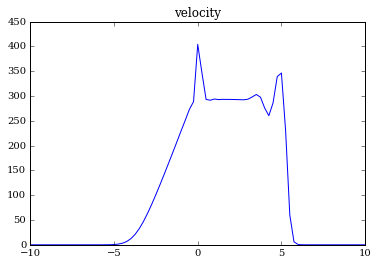

In [44]:
pyplot.title('velocity')
pyplot.plot(x,u[1,:]/u[0,:])

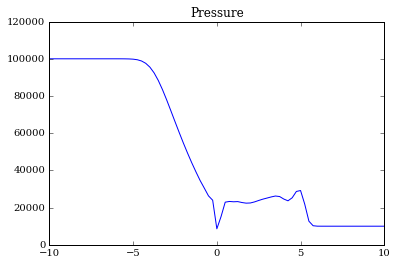

In [45]:
pyplot.title('Pressure')
pyplot.plot(x,0.4*(u[2,:]-u[1,:]**2/u[0,:]))

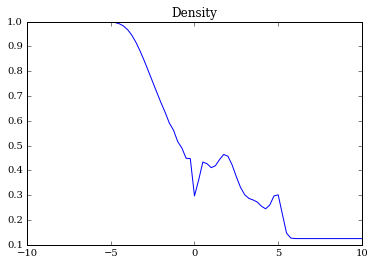

In [46]:
pyplot.title('Density')
pyplot.plot(x,u[0,:])

In [47]:
index=numpy.where(x==2.5)
print ('The Velocity at x = 2.5:', "%.2f" %(u[1,index]/u[0,index]),'m/s')

print ('The Pressure at x = 2.5:', "%.2f" %(0.4*(u[2,index]-0.5*u[1,index]**2/u[0,index])),'pa')

print ('The Density at x = 2.5:', "%.2f" %(u[0,index]),'Kg/cube.m')

The Velocity at x = 2.5: 292.61 m/s
The Pressure at x = 2.5: 30250.89 pa
The Density at x = 2.5: 0.37 Kg/cube.m
